In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from data import VideoFrameFolder

In [2]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = torchvision.transforms.functional.to_pil_image(inp)
    plt.imshow(inp)
    plt.axis('off')
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [3]:
vid_file = 'videos/IMG_2139.MOV'

In [70]:

data_transforms = {
    'train': transforms.Compose([
        #transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


val_dataset = VideoFrameFolder('/home/tormod/ucph-erda-home/frames/',
                              transform=data_transforms['val'])
val_dataloader = torch.utils.data.DataLoader(val_dataset,
                                            batch_size=30,
                                            shuffle=False,
                                            num_workers=8,
                                            prefetch_factor=4)

In [45]:
det = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /home/tormod/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

In [62]:
val_dataset[0][0].shape

torch.Size([3, 1280, 720])

In [71]:
if 'pred' in globals():
    del pred
det.eval()
pred = det(val_dataset[0][0].unsqueeze(0))
#pred

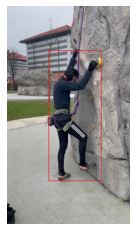

In [72]:
def draw_best_box(frames, preds):
    imgs = []
    for f, p in zip(frames, preds): 
        uint_inputframe = torchvision.transforms.functional.convert_image_dtype(f, torch.uint8)
        wboxes = torchvision.utils.draw_bounding_boxes(uint_inputframe, p['boxes'][0:1], colors=['red'], width=3)
        imgs.append(wboxes)
    return torchvision.utils.make_grid(imgs)

imshow(draw_best_box(val_dataset[0][0].unsqueeze(0), pred))